In [208]:
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range, input

In [209]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from util import get_clouds ## util is a utility python file
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [210]:
class LinearSVM:
    def __init__(self, C=1.0):
        self.C=C
        
    def _decision_function(self, X):  # decision boundry of SVM
        return np.dot(X,self.w) + self.b

    
    def predict(self, X):  # prediction of SVM with ---> y*(w.T*w+b)
        return np.sign(self._decision_function(X))

    
    def _objective(self, margins): # Hinge Loss function ---> 1/2*(W.T*W)+C*Summation max(0,1-y*(W.T*W+b))
        return 0.5 * np.dot(self.w,self.w) + self.C * np.maximum(0, 1 - margins).sum()

    def score(self, X, Y): # getting the accuracy
        P = self.predict(X)
        return np.mean(Y == P)
    
    
    def fit(self,X,Y,lr=1e-5,n_iters=400): # fit function
        N, D = X.shape # row and column
        self.N = N # no. of training examples (rows of X)
        self.w = np.random.randn(D) # no. of weights = no. of features (columns of X) and initialize with random
        self.b = 0 # initialize with zero
    
   
    
        #gradient descent
        losses=[]
        for i in range(n_iters):
          margins = Y * self._decision_function(X) # margins for all training examples, it is functional margins
            # margin = y(i) * (w.t*x(i)+b) so margins for all---> Y or target vector
            
          
          loss = self._objective(margins) # loss or cost of all margins for one iteration
          losses.append(loss) # by appending to losses, the size or the number of items of losses will be equal n_iters
      
          idx = np.where(margins < 1)[0] # change to numpy ndarray by adding [0]
          
          grad_w = self.w - self.C * Y[idx].dot(X[idx]) # dL/dW = W - C* y(i)*x(i) where, E >0
          self.w -= lr * grad_w # gradient descent
          grad_b = -self.C * Y[idx].sum() # - C * Summation y(i) where , E >0
          self.b -= lr * grad_b # gradient descent
            
            
        self.support_ = np.where((Y * self._decision_function(X)) <= 1)[0] # support vectors violating the margins
        # if the margins is less than or equal 1, they are violating the margins or on the margins
        print("num SVs:", len(self.support_))

        print("w:", self.w)
        print("b:", self.b)

        # hist of margins
        # m = Y * self._decision_function(X)
        # plt.hist(m, bins=20)
        # plt.show()

        plt.plot(losses)
        plt.title("loss per iteration")
        plt.show()


In [211]:
def plot_decision_boundary(model, X, Y, resolution=100, colors=('b', 'k', 'r')):
  np.warnings.filterwarnings('ignore')
  fig, ax = plt.subplots()

  # Generate coordinate grid of shape [resolution x resolution]
  # and evaluate the model over the entire space
  x_range = np.linspace(X[:,0].min(), X[:,0].max(), resolution)
  y_range = np.linspace(X[:,1].min(), X[:,1].max(), resolution)
  grid = [[model._decision_function(np.array([[xr, yr]])) for yr in y_range] for xr in x_range]
  grid = np.array(grid).reshape(len(x_range), len(y_range))
  
  # Plot decision contours using grid and
  # make a scatter plot of training data
  ax.contour(x_range, y_range, grid.T, (-1, 0, 1), linewidths=(1, 1, 1),
             linestyles=('--', '-', '--'), colors=colors)
  ax.scatter(X[:,0], X[:,1],
             c=Y, lw=0, alpha=0.3, cmap='seismic')
  
  # Plot support vectors (non-zero alphas)
  # as circled points (linewidth > 0)
  mask = model.support_
  ax.scatter(X[:,0][mask], X[:,1][mask],
             c=Y[mask], cmap='seismic')

  # debug
  ax.scatter([0], [0], c='black', marker='x')

  # debug
  # x_axis = np.linspace(X[:,0].min(), X[:,0].max(), 100)
  # w = model.w
  # b = model.b
  # # w[0]*x + w[1]*y + b = 0
  # y_axis = -(w[0]*x_axis + b)/w[1]
  # plt.plot(x_axis, y_axis, color='purple')
  # margin_p = (1 - w[0]*x_axis - b)/w[1]
  # plt.plot(x_axis, margin_p, color='orange')
  # margin_n = -(1 + w[0]*x_axis + b)/w[1]
  # plt.plot(x_axis, margin_n, color='orange')

  plt.show()


In [212]:
def clouds():
  X, Y = get_clouds()
  Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.33)
  return Xtrain, Xtest, Ytrain, Ytest, 1e-3, 200

In [213]:
def medical():
  data = load_breast_cancer()
  X, Y = data.data, data.target
  Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.33)
  return Xtrain, Xtest, Ytrain, Ytest, 1e-3, 200

Possible labels: {0, 1}
num SVs: 19
w: [ 0.03594126 -0.52805005 -1.50523868 -1.00770771  0.48425507  0.57194079
  0.54776797  0.02577236 -0.40797231 -0.80489683 -0.13374229  0.1442444
 -1.34749816 -0.24272159 -0.48997758  1.0174198  -0.54745453  0.61680724
 -0.37055339  0.11616992 -0.89124605 -0.77946545 -1.54445545  0.79311089
 -0.43074788 -0.1040997  -0.76757145 -2.50689166 -0.10180468  0.41359471]
b: 0.5380000000000001


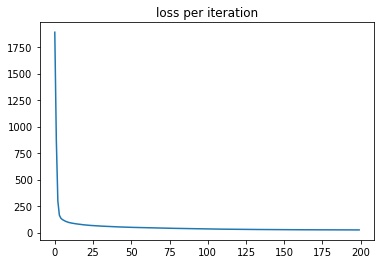

train duration: 0:00:00.170807
train score: 0.9816272965879265 duration: 0:00:00.000220
test score: 0.9627659574468085 duration: 0:00:00.000086


In [214]:
if __name__ == '__main__':
  Xtrain, Xtest, Ytrain, Ytest, lr, n_iters = medical()
  print("Possible labels:", set(Ytrain))

  # make sure the targets are (-1, +1)
  Ytrain[Ytrain == 0] = -1
  Ytest[Ytest == 0] = -1

  # scale the data
  scaler = StandardScaler()
  Xtrain = scaler.fit_transform(Xtrain)
  Xtest = scaler.transform(Xtest)

  # now we'll use our custom implementation
  model = LinearSVM(C=1.0)

  t0 = datetime.now()
  model.fit(Xtrain, Ytrain, lr=lr, n_iters=n_iters)
  print("train duration:", datetime.now() - t0)
  t0 = datetime.now()
  print("train score:", model.score(Xtrain, Ytrain), "duration:", datetime.now() - t0)
  t0 = datetime.now()
  print("test score:", model.score(Xtest, Ytest), "duration:", datetime.now() - t0)

  if Xtrain.shape[1] == 2:
    plot_decision_boundary(model, Xtrain, Ytrain)


Possible labels: {1, -1}
num SVs: 27
w: [-1.97694174 -1.9635855 ]
b: 0.04900000000000003


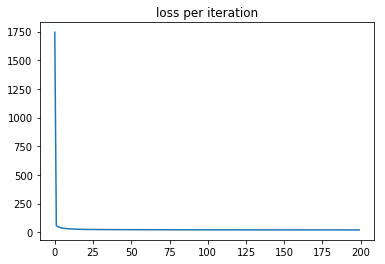

train duration: 0:00:00.139323
train score: 0.9970149253731343 duration: 0:00:00.000155
test score: 0.9984848484848485 duration: 0:00:00.000073


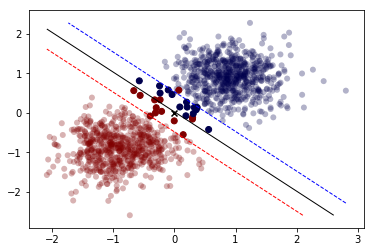

In [215]:
if __name__ == '__main__':
  Xtrain, Xtest, Ytrain, Ytest, lr, n_iters = clouds()
  print("Possible labels:", set(Ytrain))

  # make sure the targets are (-1, +1)
  Ytrain[Ytrain == 0] = -1
  Ytest[Ytest == 0] = -1

  # scale the data
  scaler = StandardScaler()
  Xtrain = scaler.fit_transform(Xtrain)
  Xtest = scaler.transform(Xtest)

  # now we'll use our custom implementation
  model = LinearSVM(C=1.0)

  t0 = datetime.now()
  model.fit(Xtrain, Ytrain, lr=lr, n_iters=n_iters)
  print("train duration:", datetime.now() - t0)
  t0 = datetime.now()
  print("train score:", model.score(Xtrain, Ytrain), "duration:", datetime.now() - t0)
  t0 = datetime.now()
  print("test score:", model.score(Xtest, Ytest), "duration:", datetime.now() - t0)

  if Xtrain.shape[1] == 2:
    plot_decision_boundary(model, Xtrain, Ytrain)
